Here, we have to check whether an individual makes more than $50,000 annually or not.

Classification has been done to predict whether a person's yearly income in US falls in the income category of greater
    than 50K Dollars or less than or equal to 50K Dollars category based on the given set of attributes.


In [2]:
#Importing the rquired libraries :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset :

census_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [4]:
census_data.shape

(32560, 15)

Our dataset has 32560 records and 15 attributes(columns)

In [5]:
census_data.head(15)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


Here, In this study our target variable is Income and we have to build a model to predict the Income depending on the various given predictors.

In [6]:
# printing Education and Education_num column

print(census_data.iloc[:, 3:5])

         Education  Education_num
0        Bachelors             13
1          HS-grad              9
2             11th              7
3        Bachelors             13
4          Masters             14
...            ...            ...
32555   Assoc-acdm             12
32556      HS-grad              9
32557      HS-grad              9
32558      HS-grad              9
32559      HS-grad              9

[32560 rows x 2 columns]


We can clearly observe that all unique values for Education are mapped to some unique numbers in Education_num,
so we can drop the "Education" column.

In [7]:
# Droping the Education column:

census_data.drop('Education', axis='columns', inplace=True)

In [8]:
census_data.shape

(32560, 14)

So, now we have 14 columns in our data set.

In [9]:
# checking the information of the dataset:

census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education_num   32560 non-null  int64 
 4   Marital_status  32560 non-null  object
 5   Occupation      32560 non-null  object
 6   Relationship    32560 non-null  object
 7   Race            32560 non-null  object
 8   Sex             32560 non-null  object
 9   Capital_gain    32560 non-null  int64 
 10  Capital_loss    32560 non-null  int64 
 11  Hours_per_week  32560 non-null  int64 
 12  Native_country  32560 non-null  object
 13  Income          32560 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


As we have 32560 records in our dataset, from info() we can see that there are no NULL values in the data.

In [10]:
# From the information of the dataset we see that Income dtype is an 'object'. We would convert it into binary one:

census_data.Income = census_data.Income.replace(' <=50K', 0)
census_data.Income = census_data.Income.replace( ' >50K', 1)

In [11]:
census_data.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [12]:
# Now we check the number of unique values of all the columns :

census_data.nunique()   # from nunique we get the number of unique values in each column.

Age                  73
Workclass             9
Fnlwgt            21647
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [13]:
# Now, checking all the unique values of categorical columns :
# categorical_features = 'Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country'

census_data["Workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
census_data["Marital_status"].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [15]:
census_data["Occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [16]:
census_data["Relationship"].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [17]:
census_data["Race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [18]:
census_data["Sex"].unique()

array([' Male', ' Female'], dtype=object)

In [19]:
census_data["Native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

We can see from the unique values that Native_country, Occupation and Workclass are having some "?" as some of their values.
So, these have to be removed by their respective column's modes.

In [20]:
#Replace "?" from Native_country, Occupation and Workclass from their respective column's modes:

census_data['Occupation'].value_counts()   # it will display the number of occurence of a particular value in a column.

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [21]:
census_data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [22]:
census_data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [23]:
# Replace "?" from Native_country, Occupation , Workclass from their respective modes

census_data['Native_country'] = census_data['Native_country'].replace(' ?',' United-States')
census_data['Occupation'] = census_data['Occupation'].replace(' ?',' Prof-specialty')
census_data['Workclass'] = census_data['Workclass'].replace(' ?',' Private')

In [24]:
census_data['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [25]:
census_data['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [26]:
census_data['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

"?" are successfully remove from our dataset.

Now, Checking for the OUTLIERS and DISTRIBUTION of the data values:

BOXPLOT:

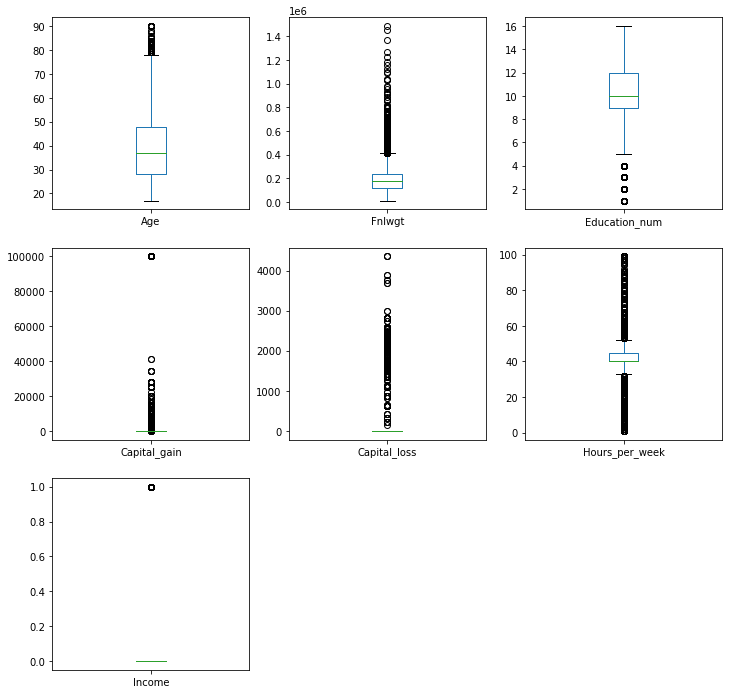

In [27]:
census_data.plot(kind = 'box', figsize = (12,12), layout = (3,3), sharex = False, subplots = True);

From above plots it can be seen that there are some outliers in numerical variables of our dataset.
These need to be treated for getting unbaised ML model.

Bar Charts:

<AxesSubplot:xlabel='Education_num'>

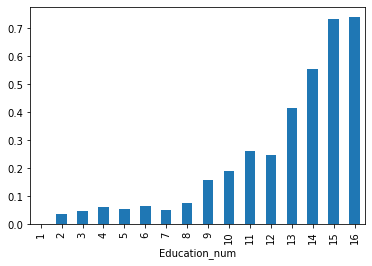

In [28]:
census_data.groupby('Education_num').Income.mean().plot(kind='bar')

<AxesSubplot:xlabel='Occupation'>

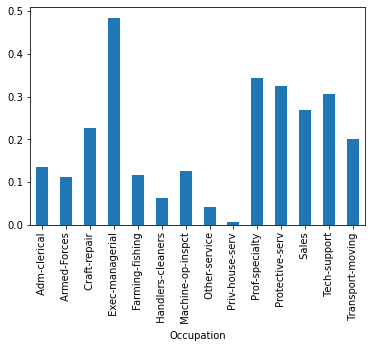

In [29]:
census_data.groupby('Occupation').Income.mean().plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

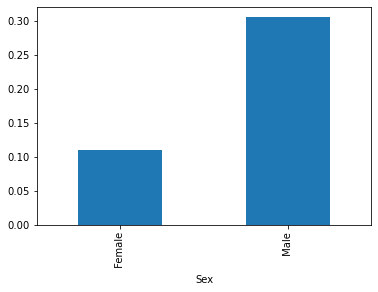

In [30]:
census_data.groupby('Sex').Income.mean().plot(kind='bar')

<AxesSubplot:xlabel='Relationship'>

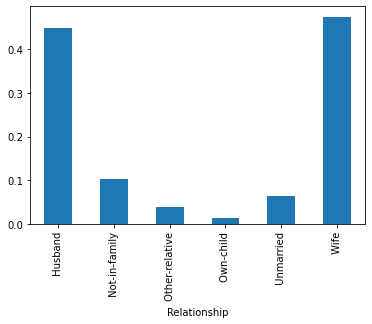

In [31]:
census_data.groupby('Relationship').Income.mean().plot(kind='bar')

<AxesSubplot:xlabel='Race'>

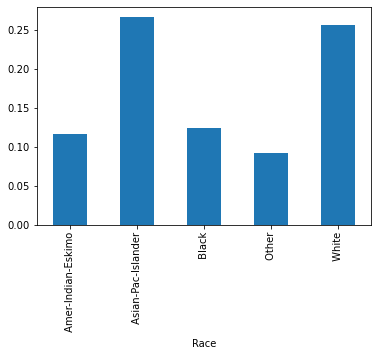

In [32]:
census_data.groupby('Race').Income.mean().plot(kind='bar')

<AxesSubplot:xlabel='Workclass'>

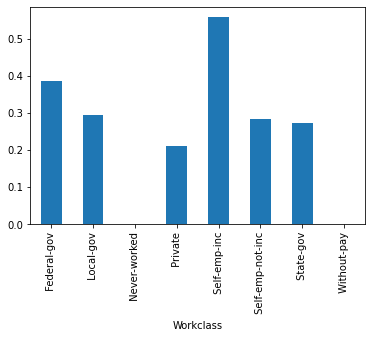

In [33]:
census_data.groupby('Workclass').Income.mean().plot(kind='bar')

Observation:

    1. Individuals with an educational background of Prof-school (7) and Doctorate (10) are having a better income.So, it could be possible that their income would be higher than 50K.
    
    2. People with occupation Prof-specialty and Exec-managerial are having a better chance of earning an income of more than 50K.
    
    3. The sex bar chart provides us that Men are more likely to have a higher income.
    
    4. Relationship chart shows us that wife and husband has a higher income. A married couple would most likely earn greater than 50K.
    
    5. As per the data, an Asian-Pac-Islander or a white have more probability of earning more than 50K.
    
    6. Self-emp-inc, Federal-gov workclass groups have a higher probability of earning more than 50K.

We can see that all of our numerical attributes have some influence on our target variable income. So, we should create an ML model by feeding all of our numerical data as input to it.

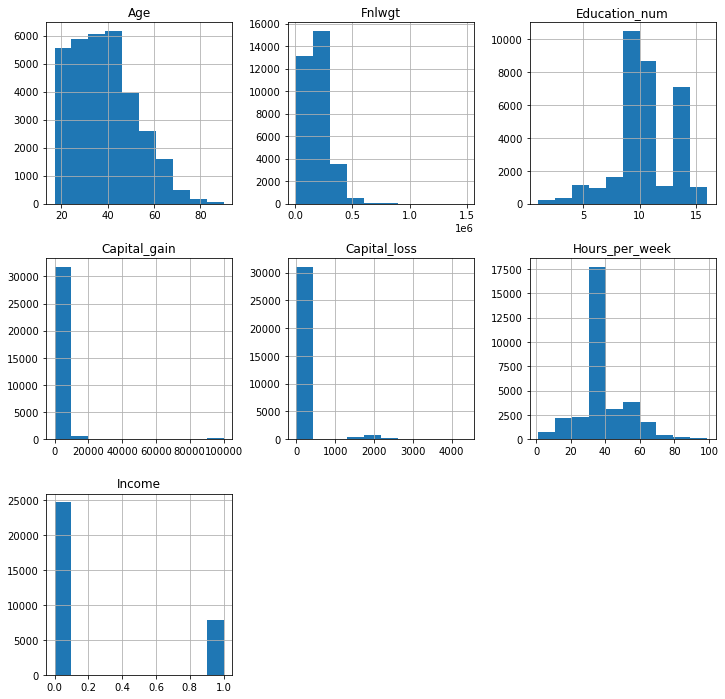

In [34]:
census_data.hist(figsize=(12,12), layout=(3,3), sharex=False);

<AxesSubplot:xlabel='Education_num', ylabel='count'>

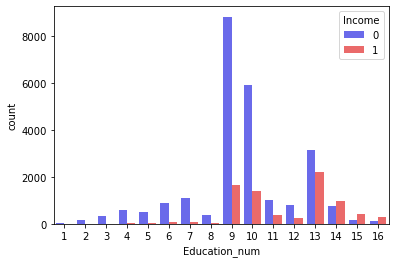

In [35]:
sns.countplot(census_data['Education_num'], hue = 'Income', data = census_data, palette = 'seismic')

In [36]:
# Setting the size of the Seaborn graph :

sns.set(rc={'figure.figsize':(21,9)})

<AxesSubplot:xlabel='Occupation', ylabel='count'>

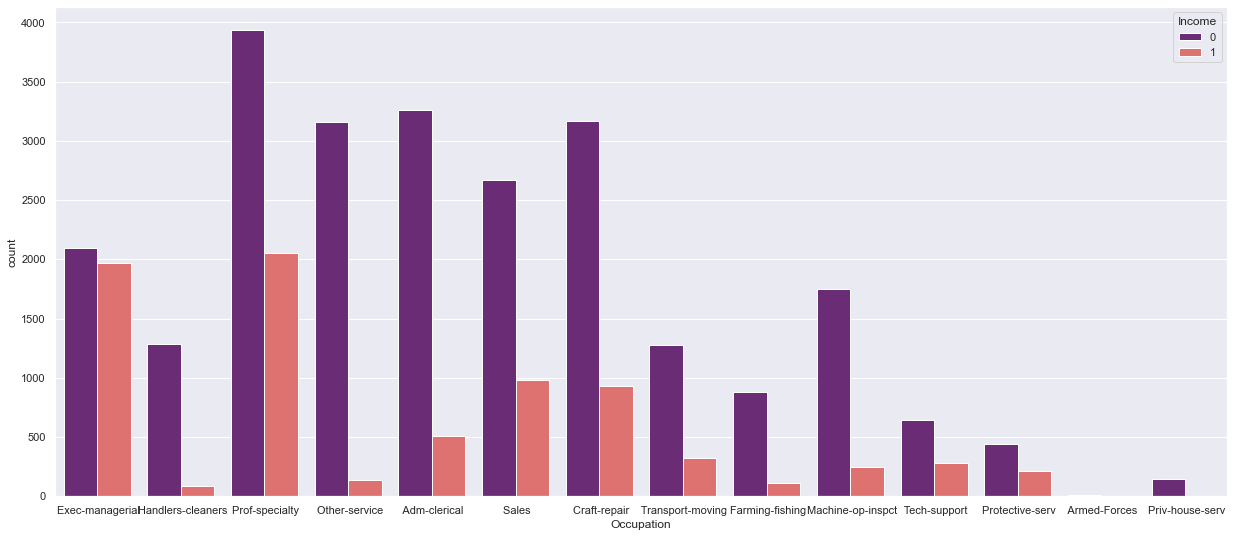

In [37]:
sns.countplot(census_data['Occupation'], hue = 'Income', data = census_data, palette = 'magma')

<AxesSubplot:xlabel='Sex', ylabel='count'>

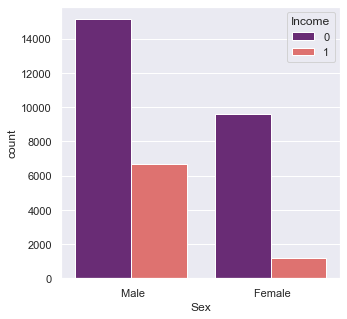

In [38]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(census_data['Sex'], hue = 'Income', data = census_data, palette = 'magma')

<AxesSubplot:xlabel='Relationship', ylabel='count'>

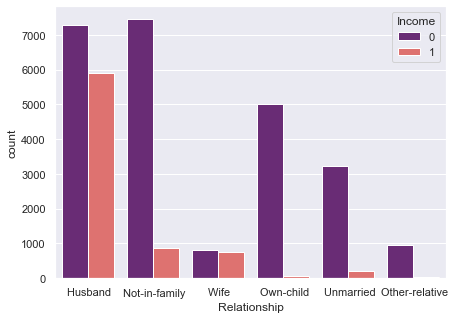

In [39]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(census_data['Relationship'], hue = 'Income', data = census_data, palette = 'magma')

<AxesSubplot:xlabel='Workclass', ylabel='count'>

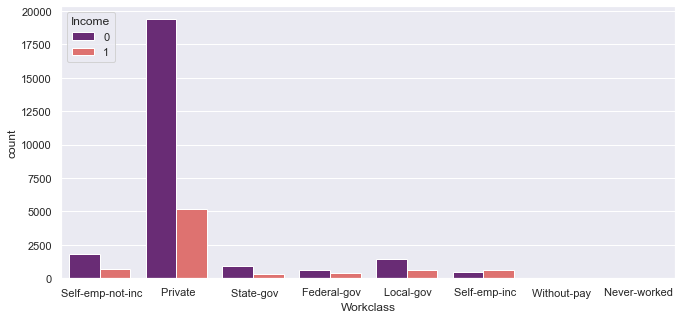

In [40]:
sns.set(rc={'figure.figsize':(11,5)})
sns.countplot(census_data['Workclass'], hue = 'Income', data = census_data, palette = 'magma')

In [41]:
# Finding the correlation between various variables:

census_data.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


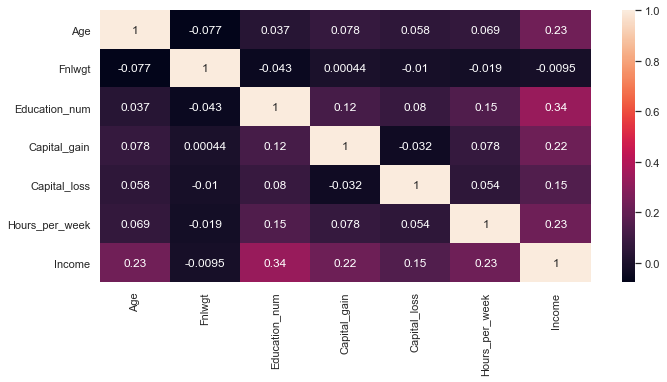

In [42]:
sns.heatmap(census_data.corr(), annot=True);

In [43]:
# Defining binary_features and nominal_features :

binary_features = ['Sex']

nominal_features = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Native_country']

In [44]:
# Function to handle binary_features :

def binary_encode(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

In [45]:
census_data = binary_encode(census_data, binary_features)

In [46]:
census_data.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,0


In [47]:
# Function to handle nominal_features :

def onehot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis = 1)
        df.drop(column, axis = 1, inplace = True)
    return df    

In [48]:
census_data = onehot_encode(census_data, nominal_features)

In [49]:
census_data

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,151910,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,201490,9,1,0,0,20,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
# Checking the data type of all variables, all variables now should be of integer datatype:

(census_data.dtypes == 'object').sum()

0

In [51]:
# Dropping Income column, which is our target variable and defining predictor dataset:

X = census_data.drop('Income', axis = 1)

In [52]:
# Defining target variable:

Y = census_data['Income']

FEATURE SCALING :

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [54]:
x

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Federal-gov,Local-gov,Never-worked,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0.452055,0.048238,0.800000,1.0,0.000000,0.0,0.122449,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.138113,0.533333,1.0,0.000000,0.0,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.493151,0.151068,0.400000,1.0,0.000000,0.0,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.150685,0.221488,0.800000,0.0,0.000000,0.0,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.273973,0.184932,0.866667,0.0,0.000000,0.0,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.136986,0.166404,0.733333,0.0,0.000000,0.0,0.377551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32556,0.315068,0.096500,0.533333,1.0,0.000000,0.0,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.561644,0.094827,0.533333,0.0,0.000000,0.0,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.068493,0.128499,0.533333,1.0,0.000000,0.0,0.193878,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
x_train,x_test,Y_train,Y_test = train_test_split(x, Y, train_size = 0.80)

Logistic Regression

In [56]:
le = LogisticRegression()
model = le.fit(x_train,Y_train)
Y_pred = model.predict(x_test)

In [57]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8447481572481572


In [58]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[4543,  347],
       [ 664,  958]], dtype=int64)

Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(x_train,Y_train)
Y_predict = model1.predict(x_test)

In [60]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_predict))

Accuracy: 0.8516584766584766


In [61]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_predict)
cnf_matrix

array([[4558,  332],
       [ 634,  988]], dtype=int64)

In [62]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4890
           1       0.75      0.61      0.67      1622

    accuracy                           0.85      6512
   macro avg       0.81      0.77      0.79      6512
weighted avg       0.85      0.85      0.85      6512



Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,Y_train)
Y_prediction = model2.predict(x_test)

In [65]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_prediction))

Accuracy: 0.8105036855036855


Gradient Descent Classifier

In [66]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gdc_model = GradientBoostingClassifier(learning_rate=0.01, random_state=41)
gdc_model.fit(x_train, Y_train)
Y_pred_gcd = gdc_model.predict(x_test)

In [68]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_gcd))

Accuracy: 0.8386056511056511


From all of the above analysis we find that the Random Forest Model is best predicting the Target variable.